# Определение перспективного тарифа для телеком компании

### Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### 1. Получение общей информации о данных

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import math    
from scipy import stats as st 
import numpy as np


In [2]:
calls = pd.read_csv('/datasets/calls.csv')  # <чтение файла с данными 
display(calls.head(5))
calls.info() #получение общей информации о данных

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.duplicated().sum() #проверка наличия дубликатов

0

In [4]:
internet = pd.read_csv('/datasets/internet.csv')  # <чтение файла с данными
display(internet.head(5))
internet.info() #получение общей информации о данных

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
internet['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 149393, 149394, 149395])

Столбец 'Unnamed: 0' не содержит какой-либо информации - удалим его:

In [6]:
internet = internet.drop('Unnamed: 0', axis=1)

In [7]:
internet.duplicated().sum() #проверка наличия дубликатов

0

In [8]:
messages = pd.read_csv('/datasets/messages.csv')  # <чтение файла с данными с сохранением в data>
display(messages.head(5))
messages.info() #получение общей информации о данных

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
messages.duplicated().sum()  #проверка наличия дубликатов

0

In [10]:
datasets = pd.read_csv('/datasets/users.csv')  # <чтение файла с данными >
display(datasets.head(5))
datasets.info()  #получение общей информации о данных

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
datasets.duplicated().sum()  #проверка наличия дубликатов

0

In [12]:
tariffs = pd.read_csv('/datasets/tariffs.csv')  # <чтение файла с данными 
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

Для дальнейшего анализа данных необходимо выполнить следущие действия на этапе предобработки данных:
- преобразовать дату, указав только месяц;
- округлить вверх значения минут и мегабайтов («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.);
- собрать данные в сводной таблице.

calls['call_date'] = pd.to_datetime(calls['call_date']).strftime('%m') #перевод даты для дальнейшей формирования таблицы с индексам месяц
internet['session_date'] = pd.to_datetime(internet['session_date']).dt.strftime('%m')
messages['message_date'] = pd.to_datetime(messages['message_date']).dt.strftime('%m')

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_month'] = calls['call_date'].dt.month

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

In [15]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

In [16]:
internet.head(3)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6


In [17]:
calls['duration'] = calls['duration'].apply(math.ceil) #округление вверх
internet['mb_used'] = internet['mb_used'].apply(math.ceil)

In [18]:
calls['duration'] = calls['duration'].replace(0,1)

In [19]:
calls.head(3)

,id,call_date,duration,user_id,call_month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6


In [20]:
print(calls.columns) #названия столбцов
print(internet.columns)
print(messages.columns)
print(datasets.columns)

Index(['id', 'call_date', 'duration', 'user_id', 'call_month'], dtype='object')
Index(['id', 'mb_used', 'session_date', 'user_id', 'month'], dtype='object')
Index(['id', 'message_date', 'user_id', 'month'], dtype='object')
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


In [21]:
 #изменение названия столбцов
calls.columns = ['id', 'call_date', 'duration', 'user_id', 'month']    
internet.columns = ['id', 'mb_used', 'session_date', 'user_id', 'month']
messages.columns = ['messages_count', 'message_date', 'user_id', 'month'] 
datasets.columns = ['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'month', 'tariff'] 

In [22]:
calls = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count', 'sum']) #сводная таблица звонков

In [23]:
calls.columns = ['count_call', 'duration_call'] #изменение названия столбцов

In [24]:
internet

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,319,2018-10-03,1499,10
149392,1499_153,491,2018-12-14,1499,12
149393,1499_154,0,2018-10-27,1499,10
149394,1499_155,1247,2018-11-26,1499,11


Составим сводные таблицы:

In [25]:
internet = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum') #сводная таблица Мб

In [26]:
messages = messages.pivot_table(index=['user_id','month'], values='messages_count', aggfunc='count') #сводная таблица смс

In [27]:
data1 = calls.merge(messages, on=['user_id', 'month'], how= 'outer') #соединение таблиц

In [28]:
data2 = data1.merge(internet, on=['user_id', 'month'], how= 'outer') #соединение таблиц

In [29]:
data2.head(10)  #10 строк сводной таблицы

count_call  duration_call  messages_count  mb_used
user_id month                                                    
1000    5            22.0          164.0            22.0   2256.0
        6            43.0          187.0            60.0  23257.0
        7            47.0          346.0            75.0  14016.0
        8            52.0          418.0            81.0  14070.0
        9            58.0          478.0            57.0  14581.0
        10           57.0          363.0            73.0  14717.0
        11           43.0          344.0            58.0  14768.0
        12           46.0          341.0            70.0   9827.0
1001    11           59.0          444.0             NaN  18452.0
        12           63.0          430.0             NaN  14053.0

In [30]:
data2 = data2.fillna(0)

In [31]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [32]:
tariffs.columns = ['messages_included', 'mg_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

In [33]:
datasets = datasets[['user_id', 'city', 'tariff']] 

In [34]:
data3 = datasets.merge(tariffs, on='tariff')

In [35]:
data3.set_index('user_id', inplace=True)

In [36]:
data = data2.join(data3) #соединение таблиц

In [37]:
data.head(3)

count_call  duration_call  messages_count  mb_used       city  \
user_id month                                                                  
1000    5            22.0          164.0            22.0   2256.0  Краснодар   
        6            43.0          187.0            60.0  23257.0  Краснодар   
        7            47.0          346.0            75.0  14016.0  Краснодар   

              tariff  messages_included  mg_per_month_included  \
user_id month                                                    
1000    5      ultra               1000                  30720   
        6      ultra               1000                  30720   
        7      ultra               1000                  30720   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5                  3000             1950         150                1   
        6                  3000             1950         150                1   
        7                  3000             1950         150                1   

               rub_per_minute  
user_id month                  
1000    5                   1  
        6                   1  
        7                   1

### 2.1. Расчет помесячной выручки с каждого пользователя 

In [38]:
data['gb_over'] = ((data['mb_used'] - data['mg_per_month_included'])/1000).apply(math.ceil) #перевод Мб в Гб

In [39]:
def over_tariff(row): # функция возвращает категорию по доходам, по значению total_income, используя правила
    if row['gb_over'] < 0:
        return 0
    return row['gb_over']*row['rub_per_gb']
data['rub_gb_over'] = data.apply(over_tariff, axis = 1) #создание столбца на основании функции

In [40]:
def over_tariff(row): # функция возвращает категорию по доходам, по значению total_income, используя правила
    a = row['duration_call'] - row['minutes_included']
    if a < 0:
        return 0   
    return a*row['rub_per_minute']
data['rub_min_over'] = data.apply(over_tariff, axis = 1) #создание столбца на основании функции

In [41]:
def over_tariff(row): # функция возвращает категорию по доходам, по значению total_income, используя правила
    b = row['messages_count'] - row['messages_included']
    if b < 0:
        return 0   
    return b*row['rub_per_message']
data['rub_mes_over'] = data.apply(over_tariff, axis = 1) #создание столбца на основании функции

In [42]:
data['income'] = data['rub_gb_over'] + data['rub_min_over'] + data['rub_mes_over'] + data['rub_monthly_fee']  

In [43]:
data.head(3) # итоговая таблица 

count_call  duration_call  messages_count  mb_used       city  \
user_id month                                                                  
1000    5            22.0          164.0            22.0   2256.0  Краснодар   
        6            43.0          187.0            60.0  23257.0  Краснодар   
        7            47.0          346.0            75.0  14016.0  Краснодар   

              tariff  messages_included  mg_per_month_included  \
user_id month                                                    
1000    5      ultra               1000                  30720   
        6      ultra               1000                  30720   
        7      ultra               1000                  30720   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5                  3000             1950         150                1   
        6                  3000             1950         150                1   
        7                  3000             1950         150                1   

               rub_per_minute  gb_over  rub_gb_over  rub_min_over  \
user_id month                                                       
1000    5                   1      -28            0           0.0   
        6                   1       -7            0           0.0   
        7                   1      -16            0           0.0   

               rub_mes_over  income  
user_id month                        
1000    5               0.0  1950.0  
        6               0.0  1950.0  
        7               0.0  1950.0

### 3. Анализ данных


In [44]:
data1 = data[['tariff', 'duration_call', 'messages_count', 'mb_used', 'income']] #таблица с данными необх для анализа

In [45]:
data1.describe() # получение основных статистических данных

,duration_call,messages_count,mb_used,income
count,3214.000000,3214.000000,3214.000000,3214.000000
mean,463.570006,38.281269,17227.585252,1552.439328
std,247.918544,36.148326,7578.261501,811.120908
min,0.000000,0.000000,0.000000,550.000000
25%,291.000000,9.000000,12505.250000,750.000000
50%,456.000000,30.000000,16966.500000,1736.500000
75%,605.000000,57.000000,21450.000000,1950.000000
max,1727.000000,224.000000,49789.000000,7024.000000


In [46]:
ultra = (data1.query('tariff =="ultra"')) # срез с тарифом ультра
ultra.describe() # получение основных статистических данных

,duration_call,messages_count,mb_used,income
count,985.000000,985.000000,985.000000,985.000000
mean,540.779695,49.363452,19486.901523,2073.045685
std,325.738740,47.804457,10096.317202,385.439859
min,0.000000,0.000000,0.000000,1950.000000
25%,292.000000,6.000000,11785.000000,1950.000000
50%,532.000000,38.000000,19324.000000,1950.000000
75%,773.000000,79.000000,26863.000000,1950.000000
max,1727.000000,224.000000,49789.000000,4950.000000


In [47]:
smart = (data1.query('tariff =="smart"')) # срез с тарифом смарт
smart.describe()  # получение основных статистических данных

,duration_call,messages_count,mb_used,income
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,429.450875,33.384029,16229.188425,1322.382234
std,194.871174,28.227876,5877.576978,842.850038
min,0.000000,0.000000,0.000000,550.000000
25%,291.000000,10.000000,12658.000000,553.000000
50%,435.000000,28.000000,16531.000000,1079.000000
75%,560.000000,51.000000,20068.000000,1804.000000
max,1471.000000,143.000000,38610.000000,7024.000000


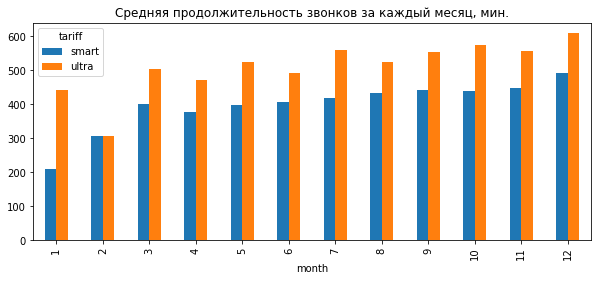

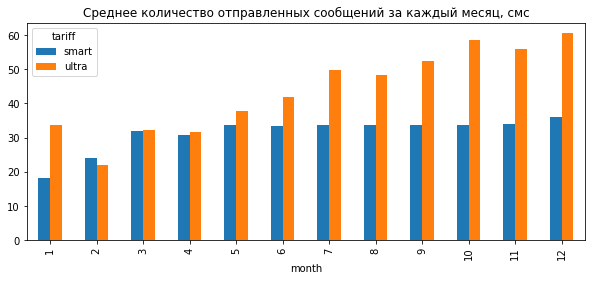

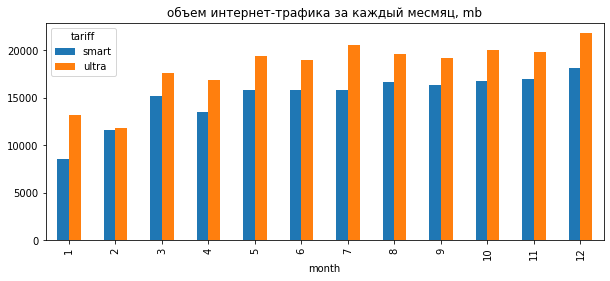

In [48]:
(data
 .pivot_table(index='month', columns='tariff', values='duration_call')
 .plot(title='Средняя продолжительность звонков за каждый месяц, мин.', y=['smart', 'ultra'], style='o-', figsize=(10,4), kind='bar')
) #
(data
 .pivot_table(index='month', columns='tariff', values='messages_count')
 .plot(title='Среднее количество отправленных сообщений за каждый месяц, смс', y=['smart', 'ultra'], style='o-', figsize=(10,4), kind='bar')
)
(data
 .pivot_table(index='month', columns='tariff', values='mb_used')
 .plot(title='объем интернет-трафика за каждый месмяц, mb', y=['smart', 'ultra'], style='o-', figsize=(10,4), kind='bar')
)

In [49]:
ultra['duration_call'].mean() - smart['duration_call'].mean()


111.32882059970893

Клиенты, пользующиеся тарифом "ultra", в среднем в месяц тратят на звонки на 111 минут больше, чем клиенты, пользующиеся тарифом "smart".

In [50]:
ultra['messages_count'].mean() - smart['messages_count'].mean()

15.979423064222651

Клиенты, пользующиеся тарифом "ultra", в среднем в месяц отправляют на 16 смс больше, чем клиенты, пользующиеся тарифом "smart".

In [51]:
ultra['mb_used'].mean() - smart['messages_count'].mean()


19453.517494130214

In [52]:
delta_income = ultra['income'].mean() - smart['income'].mean()
delta_income

750.6634510934541

Средняя мясячная выручка с одного пользователя тарифа "ultra" на 750.7 руб больше, чем пользователя тарифа "smart".

In [53]:
#стандартное отклонение для "ultra"
duration_call_std_U = 325.738740
messages_count_std_U = 47.804457
mb_used_std_U = 10096.317202

#стандартное отклонение для "smart"
duration_call_std_S = 194.871174
messages_count_std_S = 28.227876
mb_used_std_S = 5877.576978

In [54]:
print('Стандартное отклонение  duration_call тарифа "ultra": {:.2f}'.format(duration_call_std_U))
print('Стандартное отклонение  messages_count_std тарифа "ultra": {:.2f}'.format(duration_call_std_U))
print('Стандартное отклонение  mb_used_std тарифа "ultra": {:.2f}'.format(duration_call_std_U))

Стандартное отклонение  duration_call тарифа "ultra": 325.74
Стандартное отклонение  messages_count_std тарифа "ultra": 325.74
Стандартное отклонение  mb_used_std тарифа "ultra": 325.74


In [55]:
print('Дисперсия  duration_call тарифа "ultra": {:.2f}'.format(duration_call_std_U**2))
print('Дисперсия  messages_count_std тарифа "ultra": {:.2f}'.format(duration_call_std_U**2))
print('Дисперсия  mb_used_std тарифа "ultra": {:.2f}'.format(duration_call_std_U**2))

Дисперсия  duration_call тарифа "ultra": 106105.73
Дисперсия  messages_count_std тарифа "ultra": 106105.73
Дисперсия  mb_used_std тарифа "ultra": 106105.73


In [56]:
print('Стандартное отклонение  duration_call тарифа "smart": {:.2f}'.format(duration_call_std_S))
print('Стандартное отклонение  messages_count_std тарифа "smart": {:.2f}'.format(duration_call_std_S))
print('Стандартное отклонение  mb_used_std тарифа "smart": {:.2f}'.format(duration_call_std_S))

Стандартное отклонение  duration_call тарифа "smart": 194.87
Стандартное отклонение  messages_count_std тарифа "smart": 194.87
Стандартное отклонение  mb_used_std тарифа "smart": 194.87


In [57]:
print('Дисперсия  duration_call тарифа "smart": {:.2f}'.format(duration_call_std_S**2))
print('Дисперсия  messages_count_std тарифа "smart": {:.2f}'.format(duration_call_std_S**2))
print('Дисперсия  mb_used_std тарифа "smart": {:.2f}'.format(duration_call_std_S**2))

Дисперсия  duration_call тарифа "smart": 37974.77
Дисперсия  messages_count_std тарифа "smart": 37974.77
Дисперсия  mb_used_std тарифа "smart": 37974.77


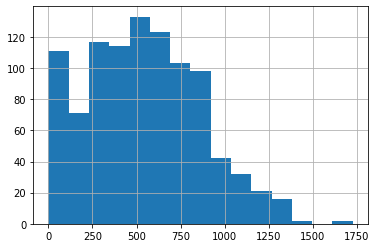

In [58]:
ultra['duration_call'].hist(bins=15, range=(0, 1727))

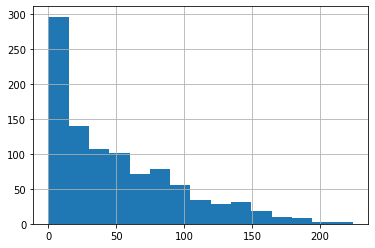

In [59]:
ultra['messages_count'].hist(bins=15, range=(0, 224.000000))

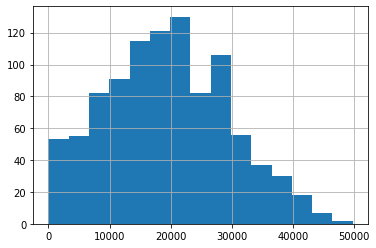

In [60]:
ultra['mb_used'].hist(bins=15, range=(0, 49789.000000))

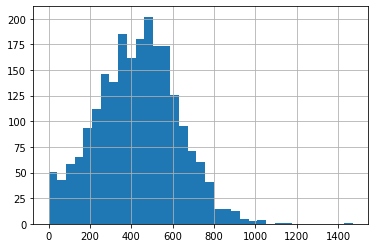

In [61]:
smart['duration_call'].hist(bins=35, range=(0, 1471))

Распределение тяготеет к нормальному. 

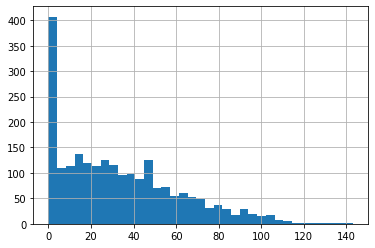

In [62]:
smart['messages_count'].hist(bins=35, range=(0, 143))

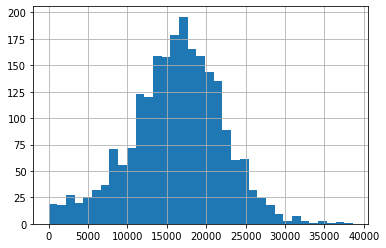

In [63]:
smart['mb_used'].hist(bins=35, range=(0, 38610.000000))

Распределение тяготеет к нормальному. 

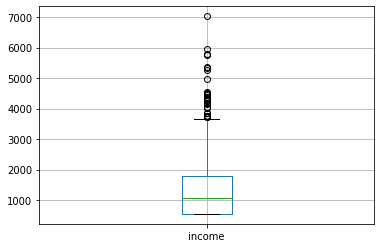

In [64]:
smart.boxplot('income')

### Вывод

Клиенты, подключившие тариф "smart", за месяц используют услуги в следующем размере:
- средняя продолжительность звонков составляет 429 минут,
- среднее количество отправленных смс составляет 33шт.,
- средний объем интернет-трафика составляет 16229 Мб.

Клиенты, подключившие тариф "ultra", за месяц используют услуги в следующем размере:
- средняя продолжительность звонков составляет 541 минуту,
- среднее количество отправленных смс составляет 49шт.,
- средний объем итернет-трафика составляет 19487Мб.

Разница средних значений двух тарифов:
- Клиенты, пользующиеся тарифом "ultra", в среднем в месяц тратят на звонки на 111 минут больше, чем клиенты, пользующиеся тарифом "smart".
- У клиентов, пользующиеся тарифом "ultra", средней объем интернет-трафика на 19453 Мб в месяц больше, чем у клиентов, пользующиеся тарифом "smart".
- Клиенты, пользующиеся тарифом "ultra", в среднем в месяц отправляют на 16 смс больше, чем клиенты, пользующиеся тарифом "smart".
- Средняя мясячная выручка с одного пользователя тарифа "ultra" на 750.7 руб больше, чем пользователя тарифа "smart".


### 4. Проверка гипотез



Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. В качестве нулевой гипотезы H₀ принимаем равенство средних двух выборок. Альтернативная гипотеза H₁: средние выборок не равны.

In [65]:
income_smart = (data
     .query('tariff =="smart"')
     .pivot_table(index='user_id', values='income')
    )
income_ultra = (data
     .query('tariff =="ultra"')
     .pivot_table(index='user_id', values='income')
    )

alpha = 0.05#  критический уровень статистической значимости

results = st.ttest_ind(
    income_smart, 
    income_ultra) #проверка гипотезы о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [3.78146615e-36]
Отвергаем нулевую гипотезу


Средняя выручка тарифов «Ультра» и «Смарт» различается. 

Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. В качестве нулевой гипотезы H₀ принимаем равенство двух выборок. Альтернативная гипотеза H₁: выборки не равны.

In [66]:
income_mos = (data
     .query('city == "Москва"')
     .pivot_table(index='user_id', values='income')
    )
income_other = (data
     .query('city != "Москва"')
     .pivot_table(index='user_id', values='income')
    )

alpha = 0.05#  критический уровень статистической значимости

results = st.ttest_ind(
    income_other, 
    income_mos) #проверка гипотезы о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.35274317]
Не получилось отвергнуть нулевую гипотезу


Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

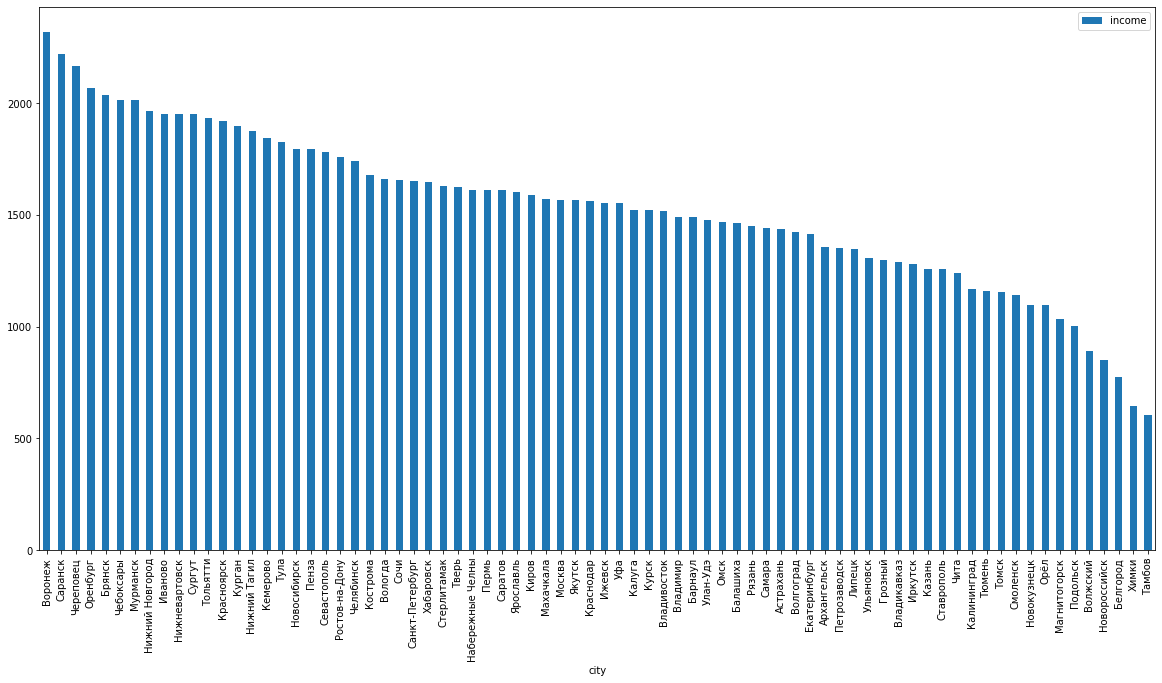

In [67]:
(data
    .pivot_table(index='city', values='income', aggfunc='mean')
    .sort_values(by = 'income', ascending = False)
    .plot(kind='bar', figsize=(20,10))
)

In [68]:
income_smart.mean()
 
income_ultra.mean()

income    2090.04903
dtype: float64

In [70]:
print('Средняя выручка тарифа smart: {}'.format(int(income_smart.mean())))
print('Средняя выручка тарифа ultra: {}'.format(int(income_ultra.mean())))

Средняя выручка тарифа smart: 1356
Средняя выручка тарифа ultra: 2090


## Вывод

- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов,
- Средняя выручка тарифа "ultra" выше, чем у тарифа "smart".

 # 5. Общий вывод

У тарифа "smart" медиана (1079руб) существенно меньше среднего (1322руб), значит среди клиентов "smart" есть те, кто мог бы перейти на более дорогой тариф "ultra".

Клиенты, подключившие тариф "smart", за месяц используют услуги в следующем размере:
- средняя продолжительность звонков составляет 429 минут,
- среднее количество отправленных смс составляет 33шт.,
- средний объем интернет-трафика составляет 16229 Мб.

Клиенты, подключившие тариф "ultra", за месяц используют услуги в следующем размере:
- средняя продолжительность звонков составляет 541 минуту,
- среднее количество отправленных смс составляет 49шт.,
- средний объем итернет-трафика составляет 19487Мб.

Особенности использования тарифов:
- Клиенты, пользующиеся тарифом "ultra", в среднем в месяц тратят на звонки на 111 минут больше, чем клиенты, пользующиеся тарифом "smart".
- У клиентов, пользующиеся тарифом "ultra", средней объем интернет-трафика на 19453 Мб в месяц больше, чем у клиентов, пользующиеся тарифом "smart".
- Клиенты, пользующиеся тарифом "ultra", в среднем в месяц отправляют на 16 смс больше, чем клиенты, пользующиеся тарифом "smart".
- Средняя мясячная выручка с одного пользователя тарифа "ultra" на 750.7 руб больше, чем пользователя тарифа "smart".

Cредняя выручка пользователей из Москвы равна выручки пользователей из других регионов (в пределах уровня статистической значимости 5%).